### hypothysis function

h(x) = x0*theta0 + x1*theta1 + x2*theta2 + ......... + xn*thetan

where n is number of columns( features ) ,  theta is parameter

In [1]:
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

%matplotlib inline

In [2]:
data = np.loadtxt(os.path.join('Data', 'data2.txt'), delimiter=',')

In [3]:
data.shape

(47, 3)

In [4]:
X, y = data[:, : 2], data[:, 2]

m = y.size 

### Feature Normalization

#### Need for Normalization :

In the dataset each feature value may have different scales i.e., one feature may be in 1000s and other may be in 0.5s to make make every feature
scale to same extent normalization is requires

#### Method :

subtract mean value of that column with its each entry and devide with standard deviation

In [5]:
def featureNormalization(X):
    X_Norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_Norm = (X-mu)/sigma
    return X_Norm , mu , sigma

In [6]:
X_norm, mu, sigma = featureNormalization(X)

In [7]:
print(mu)
print(sigma)

[2000.68085106    3.17021277]
[7.86202619e+02 7.52842809e-01]


In [8]:
m=y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [9]:
def computeCost(X,y,theta):
    h=np.dot(X,theta)
    m=y.size
    J=0
    J=(1/(2*m))*np.sum(np.square(np.dot(X,theta)-y))
    return J

In [10]:
cost=computeCost(X,y,[5,5,5])
cost

65589043729.88251

In [29]:
def GradientDescent(X,y,theta,alpha,num_iters):
    theta=theta.copy()
    J_history=[]
    m=y.size
    for i in range(num_iters):
        theta=theta-(alpha/m)*((np.dot(X,theta)-y).dot(X))
        J=computeCost(X,y,theta)
        J_history.append(J)
    return J_history ,theta

In [37]:
J_history , theta = GradientDescent(X,y,[0,0,0],0.01,2500)

Text(0, 0.5, 'cost function value')

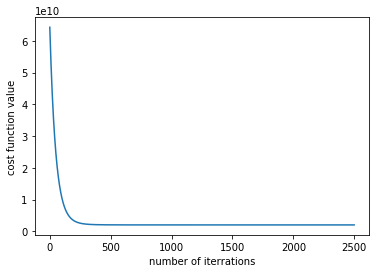

In [38]:
pyplot.plot(np.arange(len(J_history)),J_history)
pyplot.xlabel('number of iterrations')
pyplot.ylabel('cost function value')

In [45]:
J_history , theta = GradientDescent(X,y,[1,1,1],0.05,2500)

Text(0, 0.5, 'cost function value')

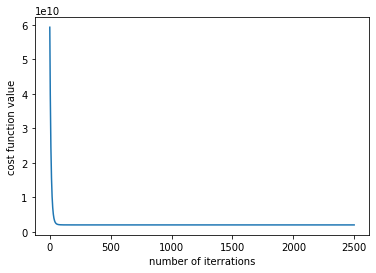

In [46]:
pyplot.plot(np.arange(len(J_history)),J_history)
pyplot.xlabel('number of iterrations')
pyplot.ylabel('cost function value')

### Normal Equations :

these formula can be used when the number of training example is very less ( prefelebly less than 10000)

theta = inv(tr(X)*X)*tr(X)*y

In [47]:
def NormalEquation(X,y,theta):
    theta=theta.copy()
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [48]:
theta = NormalEquation(X,y,[0,0,0])
theta

array([340412.65957447, 109447.79646964,  -6578.35485416])

In [49]:
computeCost(X,y,theta)

2043280050.6028283